# Sperimentazione tesi

# Regressione lineare multipla su un sottogruppo di features
In questo notebook eseguiremo una regressione lineare multipla utilizzando il Boston Housing Dataset.
Il Boston Housing Dataset contiene 506 esempi di abitazioni nella zona di Boston con le seguenti 14 features:

**CRIM** Tasso di criminalità per capita<br>
**ZN** Percentuale di terreni residenziali suddivisi in zone per lotti superiori a 25.000 sq.ft.<br>
**INDUS** Percentuale di ettari di attività non al dettaglio per città.<br>
**CHAS** Variabile dummy che indica la prossimità al fiume Charles.<br>
**NOX** Concentrazione di ossido d'azoto (parti per 10 milioni).<br>
**RM** Numero medio di stanze per abitazione<br>
**AGE** Percentuale di abitazione occupate costruite dopo il 1940<br>
**DIS** Media pesata delle distanze da 5 centri lavorativi di Boston.<br>
**RAD** Indice di accessibilità ad autostrade<br>
**TAX** Aliquota dell'imposta sulla proprietà a valore pieno in 10.000 USD.<br>
**PRATIO** Rapporto studente-insegnante per città.<br>
**BLACK** 1000(Bk - 0.63)^2 dove Bk è la percentuale di abitanti di colore per città<br>
**LSTAT** Percentuale della popolazione povera<br>
**MEDV** Mediana del valore di abitazioni occupate in 1.000 USD.<br>

Il nostro obiettivo è predirre il **MEDV** utilizzando 2 o più features.<br>
Cominciamo importando le librerie necessarie

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import plotly.graph_objs as go

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+',
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Cominciamo esplorando il DataFrame alla ricerca di correlazioni tra le varie features e tra le features e il target MEDV.<br>
In questi casi è molto utile il metodo *corr* del DataFrame, che ritorna un indice della correlazione tra le varie colonne. L'indice è un valore in un range tra -1 e 1 che assume questi significati:
* **Valore tendente allo 0:** La correlazione tra le features è nulla o scarsa.
* **Valore tendente ad 1:** Le features sono direttamente correlate (l'aumento della prima comporta l'aumento della seconda)
* **Valore tendente ad -1:** Le features sono inversamente correlate (l'aumento della prima comporta il decremento della seconda)

In [41]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Le features più direttamente correlate con MEDV sembrerebbero essere RM e ZN, mentre quelle più inversamente correlate LSTAT, PRATIO, TAX e INDUS.<br><br>
Creiamo un'altra heatmap più piccola contenente solo queste features e questa volta stampiamo anche il valore numerico della correlazione

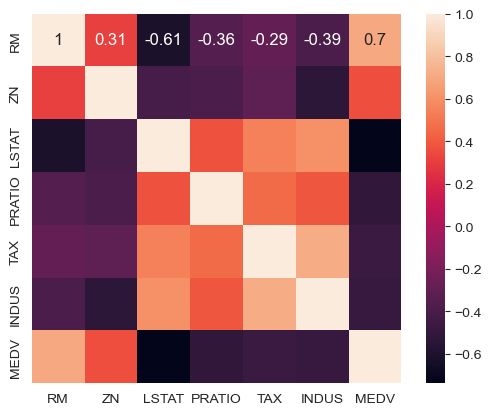

In [42]:
import seaborn as sns

cols=['RM',"ZN","LSTAT","PRATIO","TAX","INDUS","MEDV"]

hm = sns.heatmap(boston[cols].corr(),
                 cbar=True,
                 square=True,
                 yticklabels=boston[cols].columns,
                 xticklabels=boston[cols].columns,
                 annot=True,                          #Questo ci mostra i valori degli indici
                 annot_kws={'size':12})               #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

plt.show()

In [43]:
X = boston[["RM","LSTAT"]].values
Y = boston["MEDV"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 32.72507169281496
R2 score: 0.6069792285352371


In [47]:
# Creiamo una griglia per RM e LSTAT (le due variabili indipendenti)
rm_grid, lstat_grid = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 20),
                                  np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 20))

# Generiamo i valori MEDV previsti (Z) per il piano di regressione
z_pred = ll.intercept_ + ll.coef_[0] * rm_grid + ll.coef_[1] * lstat_grid

# Creazione del grafico interattivo con plotly
# Scatter plot per i dati reali e predetti
real_data = go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=Y_test,
                         mode='markers', marker=dict(size=4, color='blue', opacity=0.6),
                         name='Dati reali')

pred_data = go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=Y_pred,
                         mode='markers', marker=dict(size=4, color='red', opacity=0.6),
                         name='Dati predetti')

# Superficie del piano di regressione
plane = go.Surface(x=rm_grid, y=lstat_grid, z=z_pred, colorscale='Viridis', opacity=0.5, name='Piano di Regressione')

# Layout del grafico
layout = go.Layout(scene=dict(
    xaxis_title='RM',
    yaxis_title='LSTAT',
    zaxis_title='MEDV'),
    title='Regressione Lineare Multipla 3D Interattiva')

# Uniamo i dati e creiamo la figura
fig = go.Figure(data=[real_data, pred_data, plane], layout=layout)

# Mostriamo il grafico interattivo
fig.show()